In [6]:
# Load LIBRARY
library("NLP")
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")
text <- readLines('E:\\imarticus pga04\\R\\500_questions.csv')
docs <- Corpus(VectorSource(text))

In [7]:
#Removing SPecial chracters form data
#DATA TRANSFORMATION USING FUNCTION CONTENT_TRANSFORMER
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
docs <- tm_map(docs, toSpace, "/")
docs <- tm_map(docs, toSpace, "@")
docs <- tm_map(docs, toSpace, "\\|")


Warning message in tm_map.SimpleCorpus(docs, toSpace, "/"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, toSpace, "@"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, toSpace, "\\|"):
"transformation drops documents"

In [8]:
# Convert the text to lower case
docs <- tm_map(docs, content_transformer(tolower))
# Remove numbers
docs <- tm_map(docs, removeNumbers)
# Remove english common stopwords
docs <- tm_map(docs, removeWords, stopwords("english"))
# Remove punctuations
docs <- tm_map(docs, removePunctuation)
# Eliminate extra white spaces
docs <- tm_map(docs, stripWhitespace)


Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
"transformation drops documents"

,word,freq
sql,sql,142
key,key,119
can,can,96
object,object,84
questions,questions,73
data,data,63
one,one,63
will,will,61
asked,asked,59
class,class,52


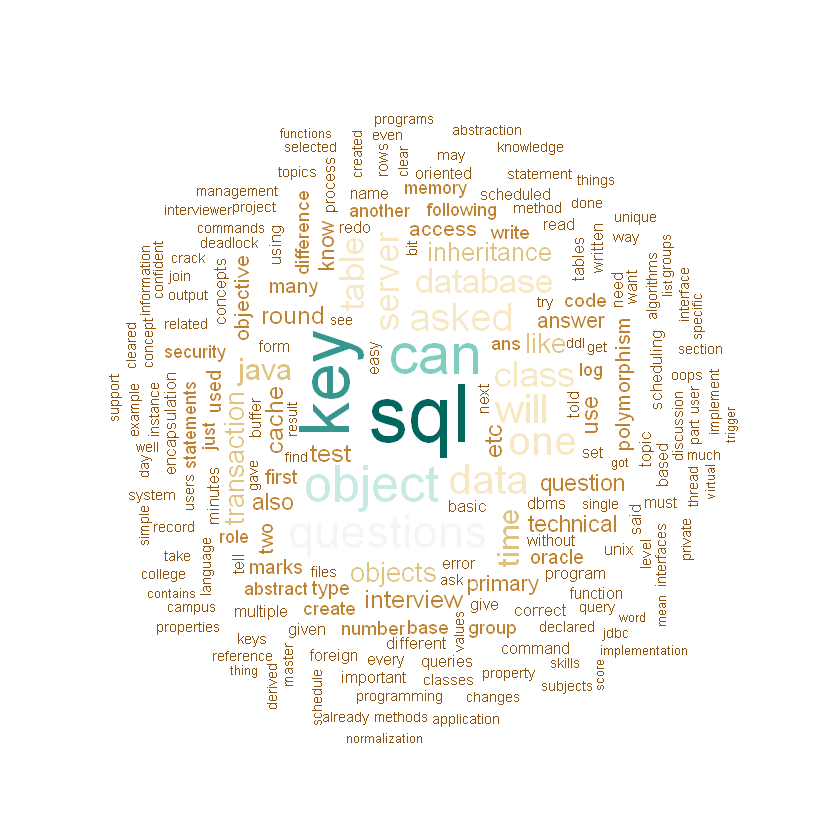

In [17]:
dtm <- TermDocumentMatrix(docs)
a <- as.matrix(dtm)
b <- sort(rowSums(a),decreasing=TRUE)
c <- data.frame(word = names(b),freq=b)
head(c, 10)
set.seed(1110)
wordcloud(words = c$word, freq = c$freq, min.freq = 2,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(9, "BrBG"))